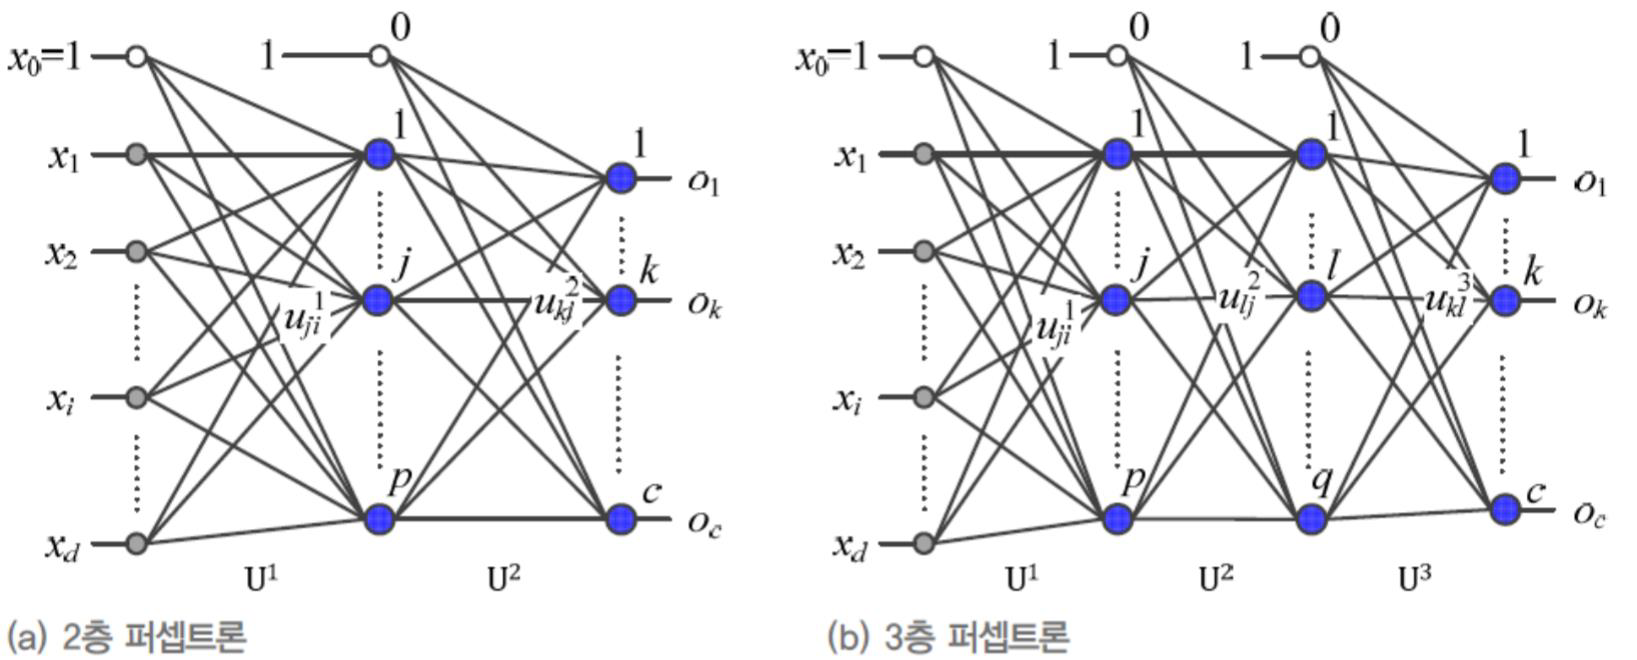

In [25]:
from random import seed
from random import random
import math
import numpy as np
 
# 네트워크 초기 설정
def initialize_network(n_inputs, n_hidden, n_outputs):  # 입력수, hidden layer 입력수, 출력수
    network = list()
    
    # 네트워크의 가중치를 0-1사이의 난수로 초기와
    # n_inputs + 1  = 데이터 집합의 각 입력 열에 대한 가중치, 바이어스에 대한 추가 가중치
    hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    network.append(hidden_layer)
    
    output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    network.append(output_layer)
    return network
 
seed(1)
network = initialize_network(2, 1, 2)
for layer in network:
    print(layer)

[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}]
[{'weights': [0.2550690257394217, 0.49543508709194095]}, {'weights': [0.4494910647887381, 0.651592972722763]}]


### forward propagation

In [26]:
# activation = sum(weight_i * input_i) + bias
def activate(weights, inputs):
    activation = weights[-1]  # Add the bias weight (bias 를 함수의 가장 마지막 가중치라고 가정)
    for i in range(len(weights)-1):   # bias weight 를 더했으니까 하나 빠져야 한다. 
        activation += weights[i]*inputs[i] # 순전파 진행 
    return activation

def sigmoid(activation):
    return (1 / (1+math.exp(-activation))) # 시그모이드 구현


# 한 계층의 모든 출력은 다음 계층의 뉴런에 대한 입력이 된다.
def forward_propagate(network, row):
     #첫번째 input 은 dataset의 array로 설정되어야한다. 
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], inputs)  
            neuron['output'] = sigmoid(activation)# 나온 계산 값을 그대로 쓰나요? NoNo~ 활성함수를 거쳐야죠 
            new_inputs.append(neuron['output']) # new_input은 다음 히든층에 들어갈 값이니까 output으로 나온 값을 다시 다음층에 넣어준다. 
        inputs = new_inputs
    return inputs

**여기까지는 순전파 학습과정이었습니다. 이 과정이 끝나면 가중치가 바뀌나요?  
답변을 답변의 근거 코딩 결과와 함께 보여주세요.**

- forward propagation 에서는 activation function 적용, input sum 을 계산하게 된다. 
- 이 과정이 끝나도 가중치는 변하지 않는다.

In [27]:
row = [1, 0, None]
output = forward_propagate(network, row)
print(output)
print("")
print("---가중치가 변하지 않는것을 확인할수 있다.---")
for layer in network:
    print(layer)

[0.6629970129852887, 0.7253160725279748]

---가중치가 변하지 않는것을 확인할수 있다.---
[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614], 'output': 0.7105668883115941}]
[{'weights': [0.2550690257394217, 0.49543508709194095], 'output': 0.6629970129852887}, {'weights': [0.4494910647887381, 0.651592972722763], 'output': 0.7253160725279748}]


### back propagation
- 출력 layer 에서 hidden layer로 뒤로 전파되어 오류에 대한 책임을 부여하고 가중치를 업데이트한다. 
- 여기서 가중치가 변하는것이다 ~~ 


### sigmoid 미분유도
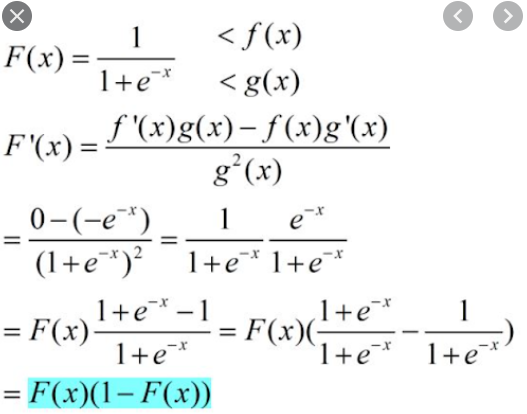



### 1. output에 대한 오류계산
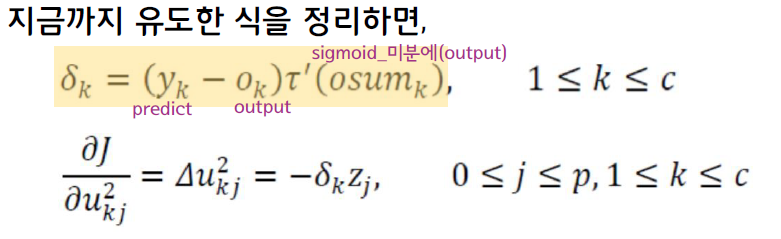

### 2. hidden layer에 대한 오류계산
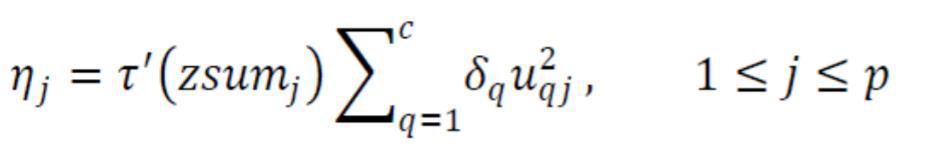

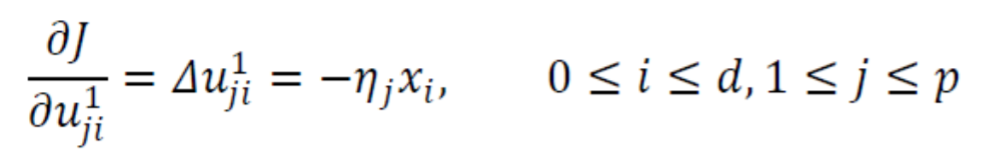

### 1. 출력 뉴런에 대한 오류를 계산하자
- error = (expected - output) * sigmoid_derivative(output)


### 2. hidden layer에 대한 오류를 계산하자
- hidden layer에 대한 오류는 출력 레이어의 각 뉴런의 가중오차로 계산된다.
- error = (weight_k * error_j) * sigmoid_derivative(output)

In [30]:
def sigmoid_derivative(output):
    return output*(1.0-output) # 시그모이드 미분 


def backward_propagate_error(network, expected):
    
    # 1 -> 0 뒤부터
    # 뒤로 작업하면서 네트워크 계층이 역순으로 반복되는것을 볼수 있다. 
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = []

        if i != len(network)-1:
            for j in range(len(layer)):
                error = 0.0
                
                # 각 뉴런에 대해 계산 된 오류 신호가 'delta'에 저장되어 있음. 
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])  # delta = error_j * sigmoid_derivative(output)
                errors.append(error) 
        else: 
            # 가장 뒷단 (가장 먼저 백프로게이션), 여기가 맨 처음 에러를 계산하는것이다. 
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(expected[j] - neuron['output']) # 역전파시 오차는 어떻게 설정했나요?  expected - output
                
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * sigmoid_derivative(neuron['output']) 
            # 시그모이드 함수를 사용한 역전파 
            # error = (expected - output) * sigmoid_derivative(output)

In [31]:
expected = [0, 1]

backward_propagate_error(network, expected)
for layer in network:
    print(layer)

[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614], 'output': 0.7105668883115941, 'delta': -0.002711797799238243}]
[{'weights': [0.2550690257394217, 0.49543508709194095], 'output': 0.6629970129852887, 'delta': -0.14813473120687762}, {'weights': [0.4494910647887381, 0.651592972722763], 'output': 0.7253160725279748, 'delta': 0.05472601157879688}]


In [32]:
# 가중치 업데이트
# weight = weight + learning_rate * error * input

def weights_update(network, row, l_rate):
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] += l_rate * neuron['delta'] # 퍼셉트론 학습 규칙(바이어스 = 1인 경우)
            

def train_network(network, train, l_rate, n_epoch, n_outputs):
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            outputs = forward_propagate(network, row)# 순전파 
            expected = [0 for i in range(n_outputs)]
            expected[row[-1]] = 1
            sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))]) # 예측값의 오차 합
            backward_propagate_error(network, expected)
            weights_update(network, row, l_rate)
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))

In [33]:
seed(1)
dataset = [[2.7810836,2.550537003,0],
    [1.465489372,2.362125076,0],
    [3.396561688,4.400293529,0],
    [1.38807019,1.850220317,0],
    [3.06407232,3.005305973,0],
    [7.627531214,2.759262235,1],
    [5.332441248,2.088626775,1],
    [6.922596716,1.77106367,1],
    [8.675418651,-0.242068655,1],
    [7.673756466,3.508563011,1]]

In [36]:
len(set([row[-1] for row in dataset]))

2

In [37]:
n_inputs = len(dataset[0])-1 # 뉴럴렛의 입력노드로 뭐가 들어가죠? 특징값! , 그럼 입력 노드의 개수는? 2개
n_outputs = len(set([row[-1] for row in dataset]))# 뉴럴렛의 출력노드의 개수는 뭐라고 했죠? class 0 과 class1 둘중하나니까 2개
network = initialize_network(n_inputs, 2, n_outputs)

train_network(network, dataset, 0.5, 20, n_outputs) # 자유롭게 설정하고 최적을 찾아보세요.

# 학습된(최적화)된 네트워크가 초기 네트워크와 달리 어떻게 변하였는지 출력하시오. (layer별로,hint : for문))
for layer in network:
    print(layer)
    print("")

>epoch=0, lrate=0.500, error=6.350
>epoch=1, lrate=0.500, error=5.531
>epoch=2, lrate=0.500, error=5.221
>epoch=3, lrate=0.500, error=4.951
>epoch=4, lrate=0.500, error=4.519
>epoch=5, lrate=0.500, error=4.173
>epoch=6, lrate=0.500, error=3.835
>epoch=7, lrate=0.500, error=3.506
>epoch=8, lrate=0.500, error=3.192
>epoch=9, lrate=0.500, error=2.898
>epoch=10, lrate=0.500, error=2.626
>epoch=11, lrate=0.500, error=2.377
>epoch=12, lrate=0.500, error=2.153
>epoch=13, lrate=0.500, error=1.953
>epoch=14, lrate=0.500, error=1.774
>epoch=15, lrate=0.500, error=1.614
>epoch=16, lrate=0.500, error=1.472
>epoch=17, lrate=0.500, error=1.346
>epoch=18, lrate=0.500, error=1.233
>epoch=19, lrate=0.500, error=1.132
[{'weights': [-1.4688375095432327, 1.850887325439514, 1.0858178629550297], 'output': 0.029980305604426185, 'delta': -0.0059546604162323625}, {'weights': [0.37711098142462157, -0.0625909894552989, 0.2765123702642716], 'output': 0.9456229000211323, 'delta': 0.0026279652850863837}]

[{'weight

In [38]:
# 학습한 네트워크로 예측값을 뽑아보자.

def predict(network, row):
    outputs = forward_propagate(network, row)
    return outputs.index(max(outputs)) 

# 순전파 결과에서 어떤것이 최종 아웃풋이 되나요?
# 확률이 가장 큰 네트워크 출력의 인덱스를 반환합니다.

In [40]:
# 네트워크가 잘 학습되었는지 확인해보자. 

for row in dataset:
    prediction = predict(network, row) # 앞서 최적(학습)시킨 네트워크로 잘 학습되었는지 평가 
    print('실제값=%d, 예측값=%d' % (row[-1], prediction))

실제값=0, 예측값=0
실제값=0, 예측값=0
실제값=0, 예측값=0
실제값=0, 예측값=0
실제값=0, 예측값=0
실제값=1, 예측값=1
실제값=1, 예측값=1
실제값=1, 예측값=1
실제값=1, 예측값=1
실제값=1, 예측값=1
